In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Parametry studni
x0 = 1.0                # półszerokość studni
V_prog = 5           # wysokość potencjału poza studnią
V_st = 0.0              # potencjał wewnątrz studni
n = 2                   # numer stanu (0, 2, 4... - parzyste; 1, 3, 5... - nieparzyste)

# Warunek kwantyzacji (definiowany przez energię)
def quantization_condition(E, n, V_prog, V_st, x0):
    if E <= V_st or E >= V_prog:
        return 1e6  # nieakceptowalna energia

    k1 = np.sqrt(2 * (V_prog - E))
    k2 = np.sqrt(2 * (E - V_st))
    
    lhs = k2 * x0
    rhs = np.pi * n / 2 + np.arctan(k1 / k2)
    return lhs - rhs

# Znajdź energię własną numerycznie
sol = root_scalar(quantization_condition, args=(n, V_prog, V_st, x0),
                  bracket=[V_st + 1e-5, V_prog - 1e-5], method='brentq')

if not sol.converged:
    raise RuntimeError("Nie udało się znaleźć energii własnej.")
    
E = sol.root
k1 = np.sqrt(2 * (V_prog - E))
k2 = np.sqrt(2 * (E - V_st))

print(f"Znaleziono E = {E:.6f}, k1 = {k1:.5f}, k2 = {k2:.5f}")

# Siatka x
x = np.linspace(-12*x0, 12*x0, 1000)

# Normalizacja i funkcja falowa
if n % 2 == 0:  # parzyste
    N1 = 1 / (np.sqrt(x0 + np.sin(2*k2*x0) / (2*k2) + np.cos(k2*x0)**2 / k1))
    A = N1 * np.cos(k2*x0) * np.exp(k1*x0)

    def psi(x):
        psi_val = np.zeros_like(x, dtype=complex)
        mask_left = x < -x0
        mask_mid = np.abs(x) <= x0
        mask_right = x > x0

        psi_val[mask_left] = A * np.exp(k1 * x[mask_left])
        psi_val[mask_mid] = N1 * np.cos(k2 * x[mask_mid])
        psi_val[mask_right] = A * np.exp(-k1 * x[mask_right])
        return psi_val

    label = f"Parzysty stan (n={n})"

else:  # nieparzyste
    N2 = 1j / (np.sqrt(x0 - np.sin(2*k2*x0) / (2*k2) + np.sin(k2*x0)**2 / k1))
    A = N2 * np.sin(k2*x0) * np.exp(k1*x0)

    def psi(x):
        psi_val = np.zeros_like(x, dtype=complex)
        mask_left = x < -x0
        mask_mid = np.abs(x) <= x0
        mask_right = x > x0

        psi_val[mask_left] = -A * np.exp(k1 * x[mask_left])
        psi_val[mask_mid] = N2 * np.sin(k2 * x[mask_mid])
        psi_val[mask_right] = A * np.exp(-k1 * x[mask_right])
        return psi_val

    label = f"Nieparzysty stan (n={n})"

Znaleziono E = 4.997990, k1 = 0.06340, k2 = 3.16164


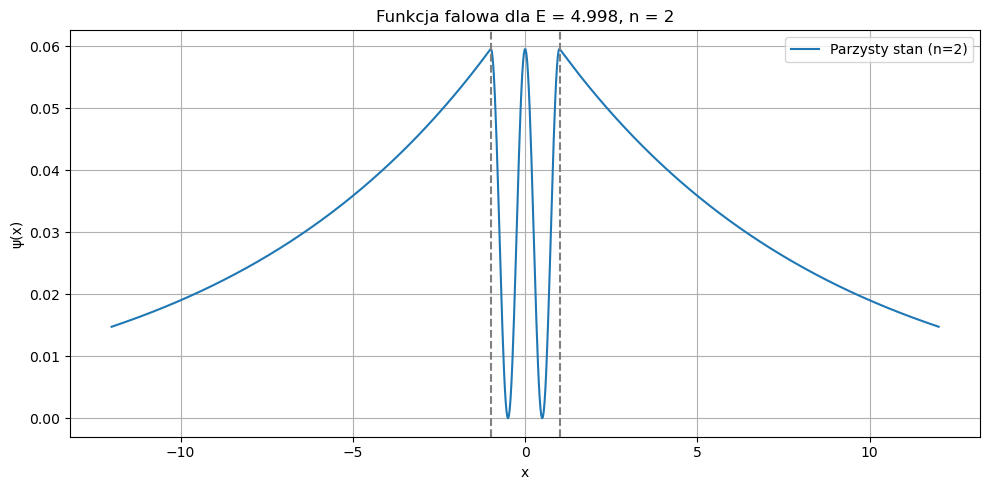

In [17]:
# Rysuj funkcję falową
psi_vals = psi(x)

plt.figure(figsize=(10, 5))
plt.plot(x, np.abs(psi_vals)**2, label=label)

plt.axvline(-x0, color='gray', linestyle='--')
plt.axvline(x0, color='gray', linestyle='--')
plt.title(f"Funkcja falowa dla E = {E:.3f}, n = {n}")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.xlim(-2*x0, 2*x0)
plt.show()


In [18]:
np.save("funkcje psi(E) dla studni kwadratowej skończonej 1D Anal.npy", psi_vals)

In [173]:
np.vdot(psi_vals, psi_vals)

np.complex128(99.90000544692478+0j)

In [178]:
N1**2*(x0 + 1 / (2*k2) * np.sin(2*k2*x0))

np.float64(0.05999597555712637)

In [175]:
np.abs(N2)**2*(x0 - 1 / (2*k2) * np.sin(2*k2*x0))

np.float64(0.8293608348555088)

In [135]:
np.vdot(psi_vals, psi_vals)

np.complex128(99.90000544692478+0j)

In [165]:
2*N1**2*(x0 + 1 / (2*k2) * np.sin(2*k2*x0))

np.float64(1.9284105253070245)

In [104]:
1 / (2*k2) * np.sin(2*k2*x0)

np.float64(0.29313453012618285)